# Clusterization k-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate 1000 random numbers for each column from a uniform distribution within the range -100 to 100
random_numbers_column1 = np.random.uniform(-100, 100, 1000)
random_numbers_column2 = np.random.uniform(-100, 100, 1000)

# Create a DataFrame with the generated numbers for both columns
data = pd.DataFrame({
    'Attribute_1': random_numbers_column1,
    'Attribute_2': random_numbers_column2
})

# Display the first few rows of the dataframe
data.head()

,Attribute_1,Attribute_2
0,54.797575,74.910963
1,80.513323,69.075126
2,41.473645,21.010140
3,-92.613455,-95.659224
4,-77.437199,-86.326171


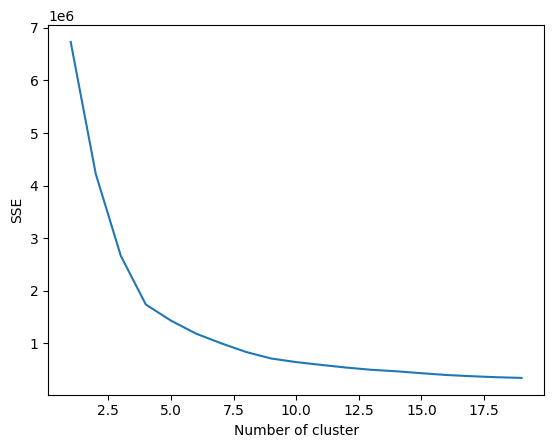

In [3]:
#Estimating the optimal the number of clusters
from sklearn.cluster import KMeans
data_k = data.copy()

sse = {}

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(data_k)
    data_k["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [4]:
#Define the number of clusters (elbow method)
n_clusters = int(input())

 5


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
  
# normalize data
scaler = StandardScaler()

X = scaler.fit_transform(data)
km = KMeans(n_clusters=n_clusters, n_init=10)
  
# fit & predict clusters
data['cluster'] = km.fit_predict(X)
  
data.head()

,Attribute_1,Attribute_2,cluster
0,54.797575,74.910963,3
1,80.513323,69.075126,3
2,41.473645,21.010140,3
3,-92.613455,-95.659224,4
4,-77.437199,-86.326171,4


<Axes: xlabel='Attribute_1', ylabel='Attribute_2'>

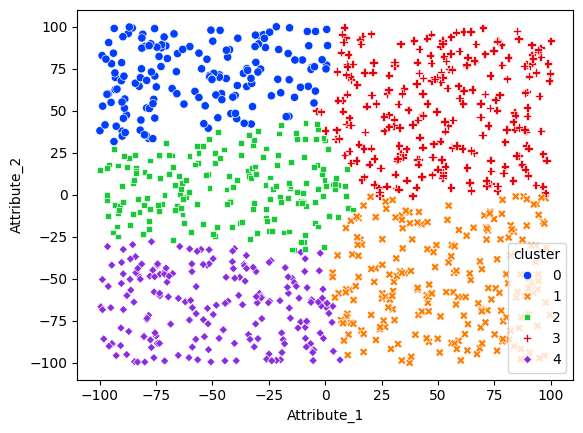

In [6]:
#ignore warnings:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Visualize the result, scatterplot:
sns.scatterplot(data=data, x='Attribute_1', y='Attribute_2', style='cluster', hue='cluster',  palette='bright')